# Introduction

Prophet is an automatic time series analysis tool written by Facebook. This is just to demonstrate how to use it, and as an exploratory analysis of some historic stocks. For the stocks we use January 1st 2010 to 2020, by day. Then we extract just the opening value.

https://facebook.github.io/prophet/docs/quick_start.html

In [73]:
import alpaca_trade_api as tradeapi
import pandas as pd

start = '2016-01-01T00:00:00.000Z' #Actually pulls barset data starting at next day.
end = '2020-07-23T00:00:00.000Z' #Actually pulls all the dates plus an extra one at the end.

api = tradeapi.REST('PKJM62G0UIEAA3T1DIHA',
                    '08PcErcQBQMmMFLPafd2zeVel6DeBkAyhEUpKHFe',
                    base_url='https://paper-api.alpaca.markets')
apple = api.get_barset(symbols='AAPL',
                       start=start,
                       end=end,
                       timeframe='day')
time = api.get_calendar(start=start,end=end)

apple = apple['AAPL'] #It's a dictionary that can handle many of tickers.
time = time#[:-1] #We take the last one off so everything matches up.
time = [str(i.date) for i in time] #this just extracts the string of the date.

opening = [bar.o for index, bar in enumerate(apple)]

df = pd.DataFrame({'ds':time,'y':opening})

Lets take a quick look at the graph to see what we are dealing with.

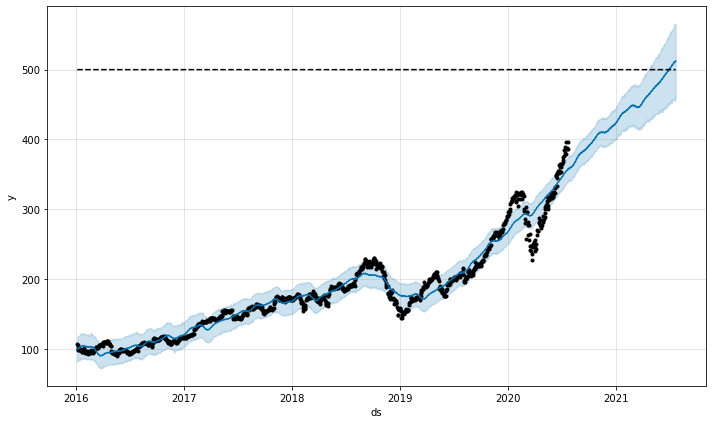

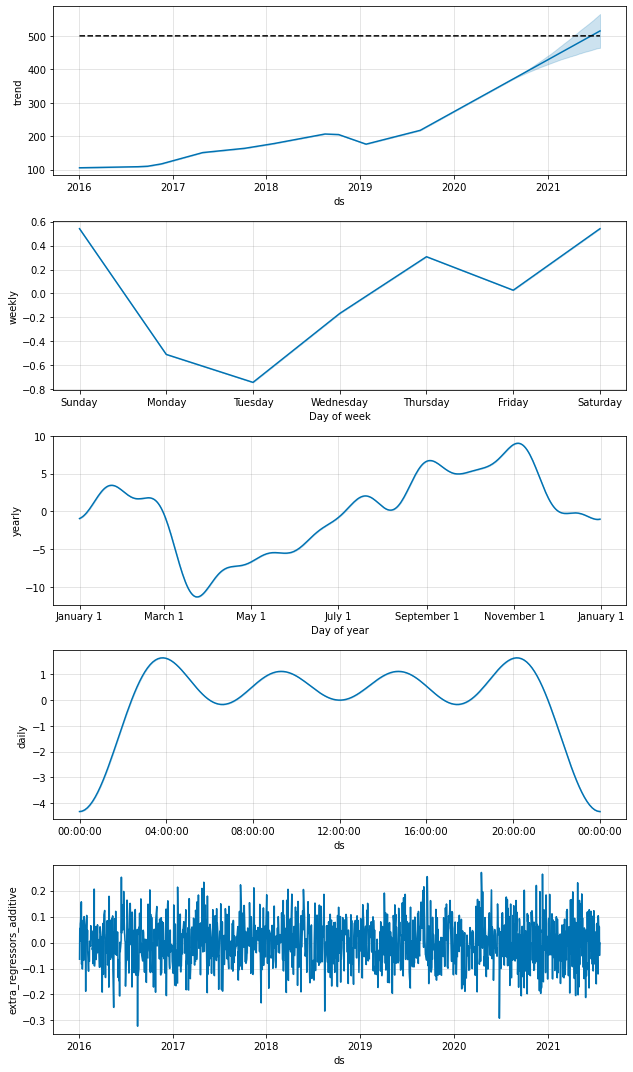

In [75]:
import pandas as pd
from fbprophet import Prophet
import numpy as np

cap = 500
df['cap'] = cap
df['reg'] = np.random.normal(size=df.shape[0])

m = Prophet(growth='linear',daily_seasonality=True)
m.add_regressor('reg')
m.fit(df)
future = m.make_future_dataframe(periods=365)
future['cap'] = cap
future['reg'] = np.random.normal(size=future.shape[0])
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)